## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Load the Dataset

In [2]:
# Load the dataset
file_path = 'Mall_Customers.csv'  # Update with your file path
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Data Preprocessing

In [3]:
# Convert categorical 'Gender' column to numeric values
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# Select features for clustering
features = data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Normalize the data
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

## Splitting the Data

In [4]:
# Splitting the data into training and testing sets (80/20 split)
train_features, test_features = train_test_split(normalized_features, test_size=0.2, random_state=42)

## Applying K-means Clustering

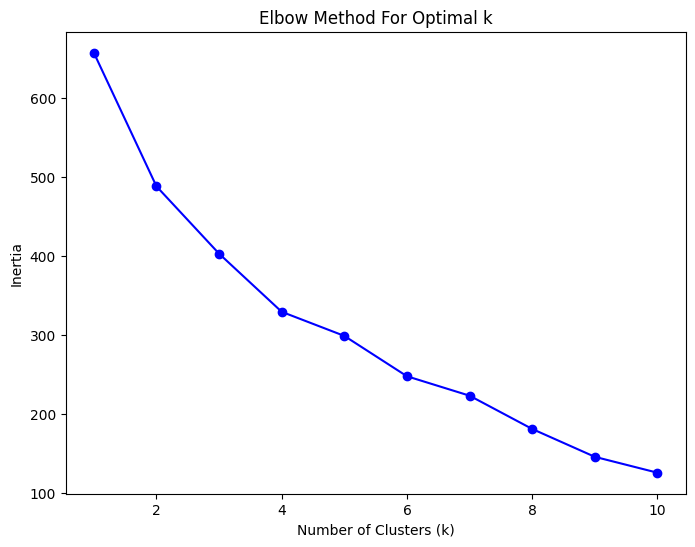

In [5]:
# Determine the optimal number of clusters using the elbow method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(train_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Choosing k=5 (based on elbow method)
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(train_features)

# Predicting clusters for both training and testing data
train_clusters = kmeans.predict(train_features)
test_clusters = kmeans.predict(test_features)

## Evaluating the Model

In [6]:
# Calculate silhouette scores
train_silhouette_score = silhouette_score(train_features, train_clusters)
test_silhouette_score = silhouette_score(test_features, test_clusters)

print(f'Train Silhouette Score: {train_silhouette_score}')
print(f'Test Silhouette Score: {test_silhouette_score}')


Train Silhouette Score: 0.26167432088500264
Test Silhouette Score: 0.2645541248704483


## Visualizing the Results

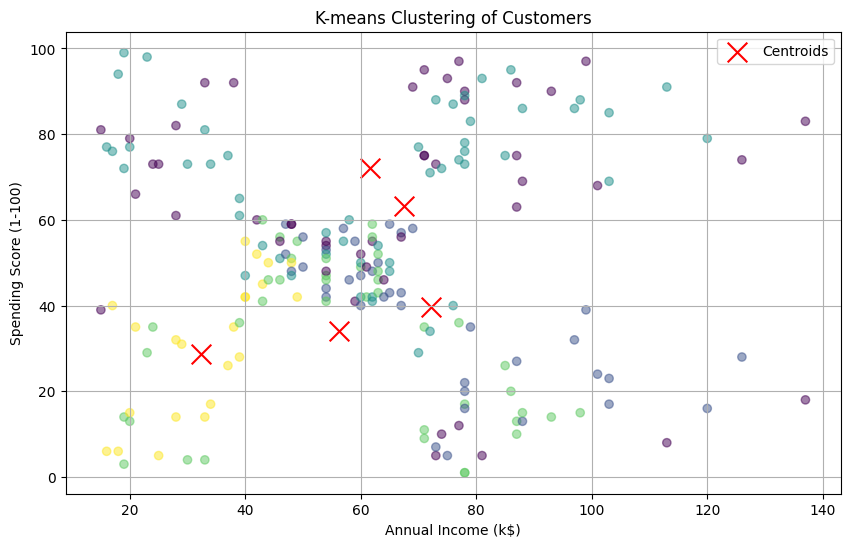

In [7]:
# Ensure all columns are numeric
data['Gender'] = data['Gender'].astype(float)
data['Age'] = data['Age'].astype(float)
data['Annual Income (k$)'] = data['Annual Income (k$)'].astype(float)
data['Spending Score (1-100)'] = data['Spending Score (1-100)'].astype(float)
data['Cluster'] = kmeans.predict(normalized_features).astype(float)

# Plotting the clusters
plt.figure(figsize=(10, 6))

# Plotting the data points
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis', marker='o', alpha=0.5)

# Plotting the centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 2], centroids[:, 3], c='red', marker='x', s=200, label='Centroids')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-means Clustering of Customers')
plt.legend()
plt.grid(True)
plt.show()
